In [66]:
import pandas as pd
import torch
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from torch import nn
import torch.optim as optim
import matplotlib.pyplot as plt
from torch.utils.data import Dataset,DataLoader

In [67]:
torch.manual_seed(42)

In [68]:
df=pd.read_csv('fmnist_small.csv')
df.head()

label  pixel1  pixel2  pixel3  ...  pixel781  pixel782  pixel783  pixel784
0      9       0       0       0  ...       213       165         0         0
1      7       0       0       0  ...         0         0         0         0
2      0       0       0       0  ...         0         0         0         0
3      8       0       0       0  ...         0         0         0         0
4      8       0       0       0  ...         0         0         0         0

[5 rows x 785 columns]

In [69]:
df.shape

(6000, 785)

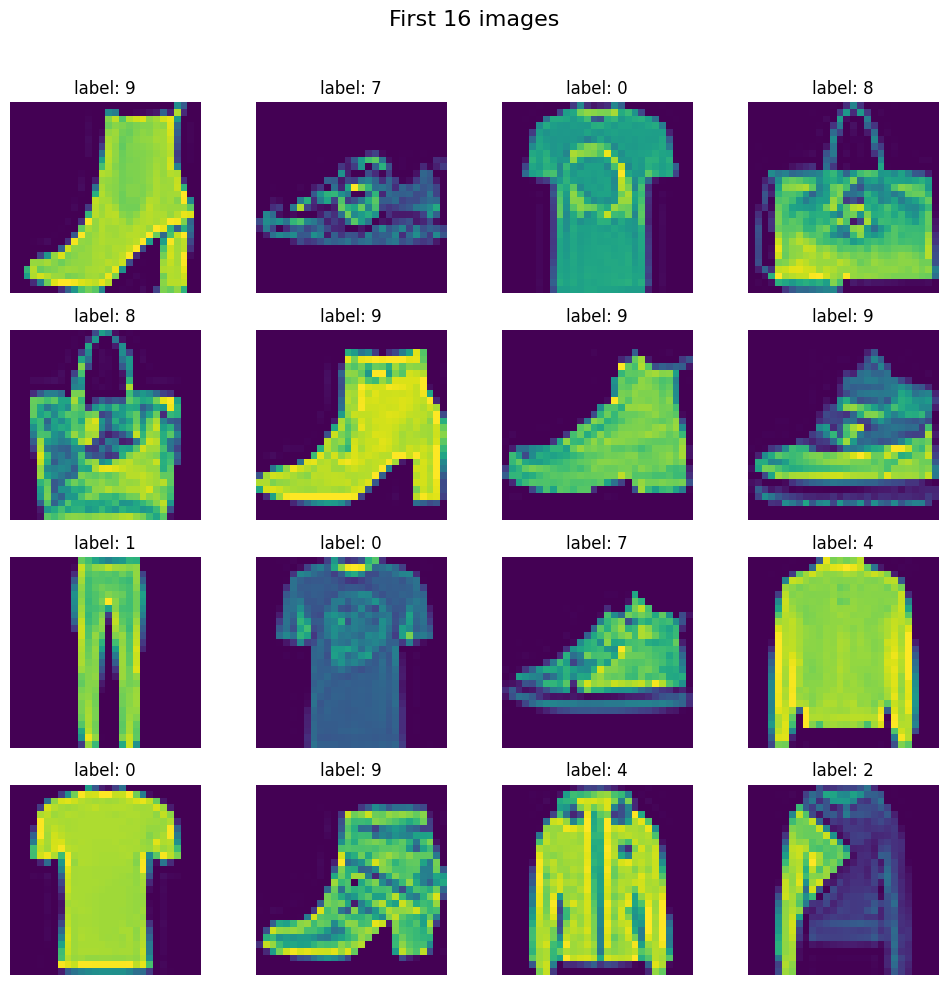

In [70]:
fig,axes=plt.subplots(4,4,figsize=(10,10))
fig.suptitle("First 16 images",fontsize=16)
for i,ax in enumerate(axes.flat):
    img=df.iloc[i,1:].values.reshape(28,28)
    ax.imshow(img)
    ax.axis('off')
    ax.set_title(f"label: {df.iloc[i,0]}")

plt.tight_layout(rect=[0,0,1,0.96])
plt.show()

In [71]:
X=df.iloc[:,1:].values
y=df.iloc[:,0].values

In [72]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [73]:
X_train=X_train/255.0
X_test=X_test/255.0

In [74]:
X_train

array([[0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       ...,
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.0627451, 0.       ,
        0.       ]])

In [75]:
class CustomDataset(Dataset):

  def __init__(self,features,labels) -> None:
     self.features=torch.tensor(features,dtype=torch.float32)
     self.labels=torch.tensor(labels,dtype=torch.long)

  def __len__(self):
    return len(self.features)

  def __getitem__(self,index):
    return self.features[index],self.labels[index]



In [76]:
train_dataset=CustomDataset(X_train,y_train)

In [77]:
len(train_dataset)


4800

In [78]:
test_dataset=CustomDataset(X_test,y_test)

In [79]:
train_loader=DataLoader(train_dataset,batch_size=32,shuffle=True)
test_loader=DataLoader(test_dataset,batch_size=32,shuffle=False)

In [80]:
class MyNN(nn.Module):

  def __init__(self,num_features):
    super().__init__()
    self.model=nn.Sequential(
        nn.Linear(num_features,128),
        nn.ReLU(),
        nn.Linear(128,64),
        nn.ReLU(),
        nn.Linear(64,10)
    )

  def forward(self,x):
    return self.model(x)

In [81]:
epochs=100
learning_rate=0.1

In [82]:
model=MyNN(X_train.shape[1])

criterian=nn.CrossEntropyLoss()

optimizer=optim.SGD(model.parameters(),lr=learning_rate)

In [85]:
for epoch in range(epochs):
  total_epoch_loss=0
  for batch_features,batch_labels in train_loader:

    #forward pass
    outputs=model(batch_features)

    #cal loss
    loss=criterian(outputs,batch_labels)

    #back pass
    optimizer.zero_grad()
    loss.backward()
    #update grad
    optimizer.step()

    total_epoch_loss+=loss.item()

  print(f"Epoch {epoch+1}/{epochs}, Loss: {total_epoch_loss/len(train_loader)}")

Epoch 1/100, Loss: 1.3216368440786999
Epoch 2/100, Loss: 0.7793365436792373
Epoch 3/100, Loss: 0.6427524652083715
Epoch 4/100, Loss: 0.5751657336950302
Epoch 5/100, Loss: 0.528180201848348
Epoch 6/100, Loss: 0.49528750121593473
Epoch 7/100, Loss: 0.4602432996034622
Epoch 8/100, Loss: 0.4359459094206492
Epoch 9/100, Loss: 0.41829214423894884
Epoch 10/100, Loss: 0.3984092291692893
Epoch 11/100, Loss: 0.3850264506538709
Epoch 12/100, Loss: 0.3722685620188713
Epoch 13/100, Loss: 0.3477362078428268
Epoch 14/100, Loss: 0.3467242218057315
Epoch 15/100, Loss: 0.3138812760512034
Epoch 16/100, Loss: 0.3126461291313171
Epoch 17/100, Loss: 0.29552092105150224
Epoch 18/100, Loss: 0.2857150869568189
Epoch 19/100, Loss: 0.27084775785605114
Epoch 20/100, Loss: 0.26237100958824155
Epoch 21/100, Loss: 0.25756089876095456
Epoch 22/100, Loss: 0.24232648963729542
Epoch 23/100, Loss: 0.23957946779827277
Epoch 24/100, Loss: 0.2261324493587017
Epoch 25/100, Loss: 0.2233684351791938
Epoch 26/100, Loss: 0.21165

In [86]:
model.eval()

MyNN(
  (model): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=64, bias=True)
    (3): ReLU()
    (4): Linear(in_features=64, out_features=10, bias=True)
  )
)

In [106]:
#evalution
total=0
correct=0

with torch.no_grad():
  for batch_features,batch_labels in test_loader:
    outputs=model(batch_features)

    _, predicted= torch.max(outputs,1)

    total=total +batch_labels.shape[0]

    correct=correct + (predicted==batch_labels).sum().item()
print(correct/total)

0.8325


In [105]:
_, predicted= torch.max(outputs,1)

tensor([6, 1, 0, 7, 8, 4, 6, 3, 6, 7, 2, 7, 5, 7, 1, 2])